In [70]:
import torch
import matplotlib.pyplot as plt
words = open('names.txt', 'r').read().splitlines()

In [71]:
letters = sorted(list(set(''.join(words))))
str_to_inx = {str:inx+1 for inx, str in enumerate(letters)}
str_to_inx['.'] = 0
inx_to_str = {inx:str for str, inx in str_to_inx.items()}
str_to_inx

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [72]:
#create the training set of bigrams (x,y)
xs, ys = [], []
for w in words[:1]:
    chars = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chars, chars[1:]):
        xi = str_to_inx[ch1]
        yi = str_to_inx[ch2]
        xs.append(xi)
        ys.append(yi)

xs, ys = torch.tensor(xs), torch.tensor(ys)
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [73]:
# one hot encoding integers
import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes=27).float()
y_enc = F.one_hot(ys, num_classes=27).float()
x_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

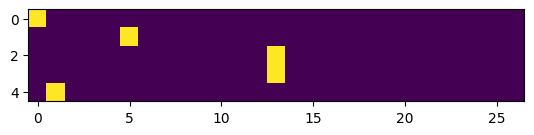

In [74]:
plt.imshow(x_enc)

In [75]:
W = torch.randn((27, 27))
x_enc @ W

tensor([[-1.1221,  0.4975,  0.9501, -0.0692,  0.2562,  0.9297,  1.3626, -0.8207,
         -0.1693, -0.2715,  0.0614,  0.0615,  0.8004,  0.7681,  0.6384, -1.0057,
          1.3487, -0.0503,  0.9122,  1.2411, -1.3109, -0.2005, -1.0412,  0.8934,
          0.4668,  0.7867, -0.2826],
        [ 0.5049,  0.6413,  0.5031,  1.7633,  1.0449,  2.1285,  1.7352,  0.1866,
         -1.4913,  1.7246,  0.3871, -0.0444, -1.9396, -0.3272,  0.2607, -2.0826,
         -1.3554, -0.4181,  0.5943,  0.9577,  2.0643,  1.6055, -0.3285, -0.4983,
          0.6241, -1.9504, -0.6923],
        [ 0.0737,  0.0552,  0.1166, -0.0873, -1.6689, -0.3885,  0.1239,  0.0134,
          0.7035,  1.2386, -1.5401, -0.1255, -0.2123, -0.1886,  0.1286, -0.6627,
          1.7876, -1.2225, -0.9727, -1.1242,  0.4126, -0.0472,  0.7753,  1.3683,
         -0.5103,  1.2932, -0.7641],
        [ 0.0737,  0.0552,  0.1166, -0.0873, -1.6689, -0.3885,  0.1239,  0.0134,
          0.7035,  1.2386, -1.5401, -0.1255, -0.2123, -0.1886,  0.1286, -0.6627

In [76]:
logits = x_enc @ W # log-counts 
counts = logits.exp() # equivalent to N from naive
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0075, 0.0381, 0.0598, 0.0216, 0.0299, 0.0586, 0.0904, 0.0102, 0.0195,
         0.0176, 0.0246, 0.0246, 0.0515, 0.0499, 0.0438, 0.0085, 0.0891, 0.0220,
         0.0576, 0.0800, 0.0062, 0.0189, 0.0082, 0.0565, 0.0369, 0.0508, 0.0174],
        [0.0268, 0.0308, 0.0268, 0.0944, 0.0460, 0.1361, 0.0918, 0.0195, 0.0036,
         0.0909, 0.0239, 0.0155, 0.0023, 0.0117, 0.0210, 0.0020, 0.0042, 0.0107,
         0.0293, 0.0422, 0.1276, 0.0807, 0.0117, 0.0098, 0.0302, 0.0023, 0.0081],
        [0.0289, 0.0283, 0.0301, 0.0246, 0.0051, 0.0182, 0.0304, 0.0272, 0.0542,
         0.0925, 0.0057, 0.0237, 0.0217, 0.0222, 0.0305, 0.0138, 0.1602, 0.0079,
         0.0101, 0.0087, 0.0405, 0.0256, 0.0582, 0.1054, 0.0161, 0.0977, 0.0125],
        [0.0289, 0.0283, 0.0301, 0.0246, 0.0051, 0.0182, 0.0304, 0.0272, 0.0542,
         0.0925, 0.0057, 0.0237, 0.0217, 0.0222, 0.0305, 0.0138, 0.1602, 0.0079,
         0.0101, 0.0087, 0.0405, 0.0256, 0.0582, 0.1054, 0.0161, 0.0977, 0.0125],
        [0.0573, 0.1175,

In [77]:
# SUMMARY ------------------------------>>>>

In [78]:
xs

tensor([ 0,  5, 13, 13,  1])

In [79]:
ys

tensor([ 5, 13, 13,  1,  0])

In [80]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs hence 27 x 27
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

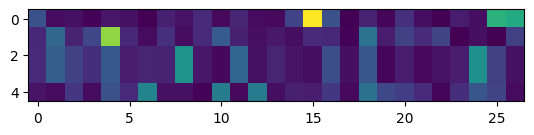

In [87]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'
plt.imshow(probs)

In [82]:
probs.shape

torch.Size([5, 27])

In [84]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {inx_to_str[x]}{inx_to_str[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.